Tomato Leaf Disease Pridiction


In [1]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt
import numpy as np

In [2]:
keras.__version__

'2.4.3'

In [3]:
train_data_path = "/content/drive/MyDrive/tomato/train"
validation_data_path = "/content/drive/MyDrive/tomato/val"

In [4]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [5]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(128, 128), # all images will be resized 
                                      batch_size=64,
                                      class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

Found 10000 images belonging to 10 classes.


In [6]:
training_data.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [7]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(128,128),
                                  batch_size=64,
                                  class_mode='categorical')

Found 1000 images belonging to 10 classes.


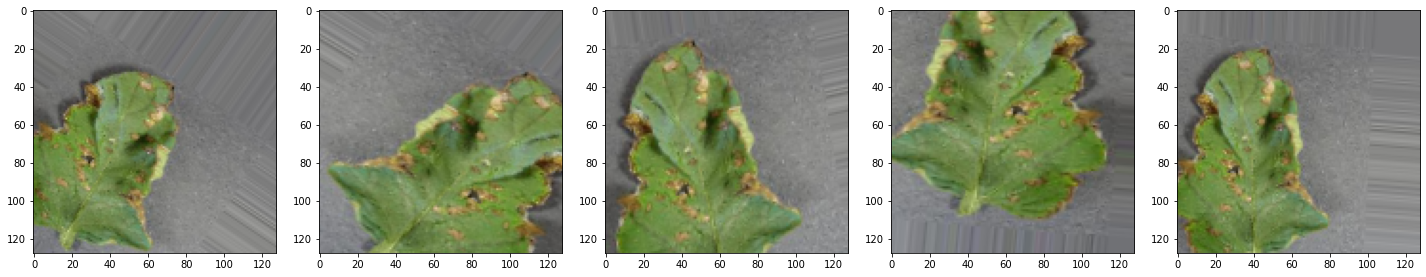

In [8]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [9]:
# save best model using vall accuracy
model_path = '/content/drive/MyDrive/tomato/tomato_pred.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [10]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[128, 128, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=10, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       2

In [15]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=60, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/60
157/157 [==============================] - 57s 363ms/step - loss: 0.3708 - accuracy: 0.8685 - val_loss: 0.8673 - val_accuracy: 0.7540

Epoch 00001: val_accuracy did not improve from 0.77600
Epoch 2/60
157/157 [==============================] - 57s 361ms/step - loss: 0.3449 - accuracy: 0.8796 - val_loss: 0.9173 - val_accuracy: 0.7600

Epoch 00002: val_accuracy did not improve from 0.77600
Epoch 3/60
157/157 [==============================] - 57s 363ms/step - loss: 0.3577 - accuracy: 0.8762 - val_loss: 0.7314 - val_accuracy: 0.7890

Epoch 00003: val_accuracy improved from 0.77600 to 0.78900, saving model to /content/drive/MyDrive/tomato/tomato_pred.h5
Epoch 4/60
157/157 [==============================] - 57s 365ms/step - loss: 0.3513 - accuracy: 0.8737 - val_loss: 1.1462 - val_accuracy: 0.7360

Epoch 00004: val_accuracy did not improve from 0.78900
Epoch 5/60
157/157 [==============================] - 57s 362ms/step - loss: 0.3427 - accuracy: 0.8768 - val_loss: 1.6488 - val_ac

In [16]:
model_path2 = '/content/drive/MyDrive/tomato/tomato_pred.h5'
cnn_model.save(model_path2)

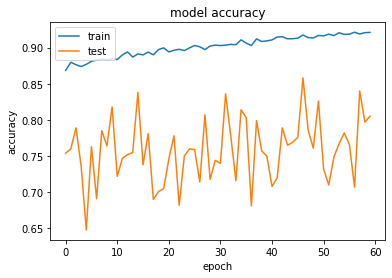

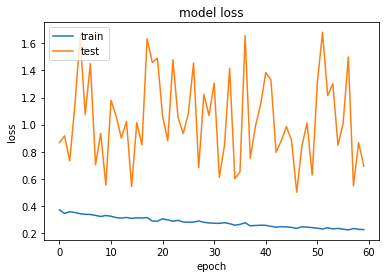

In [17]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()